In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

- 동일한 이미지에 대하여 다양한 사이즈로 변형하여 작업
- 동일 이미지에 대한 서로 다른 사이즈의 set : Image Pyramids   
1. Gaussian Pyramids
2. Laplacian Pyramids

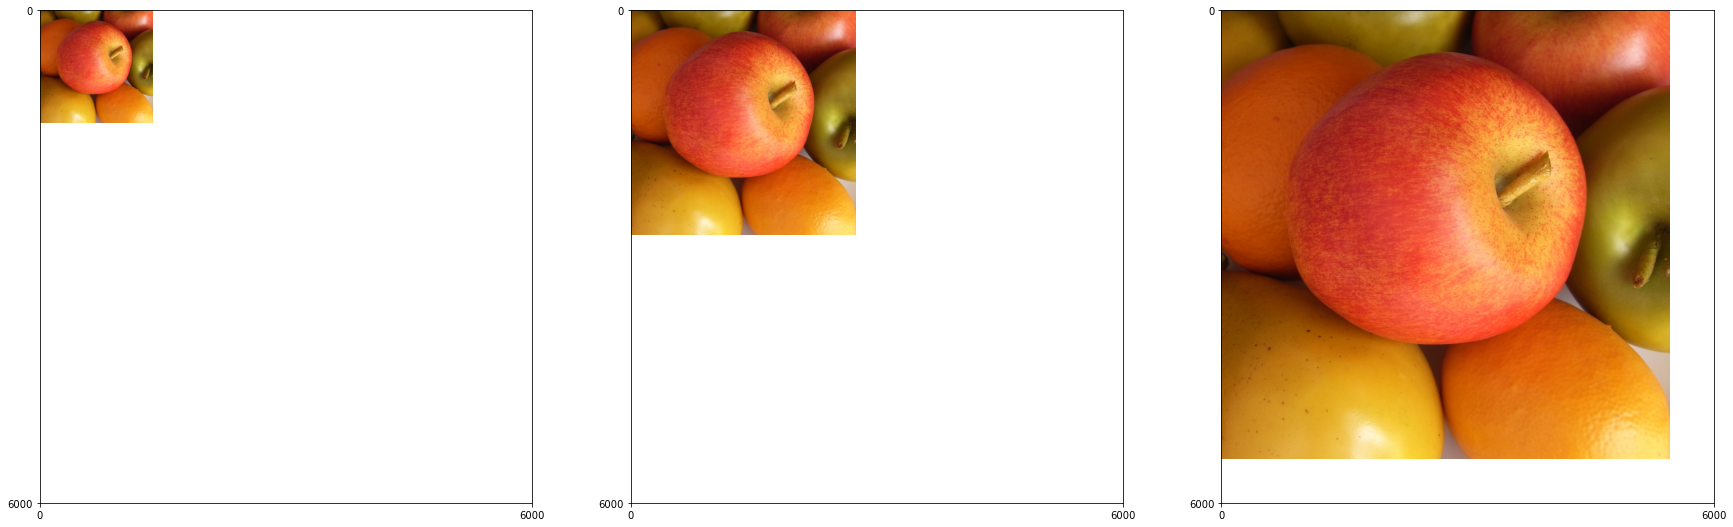

In [58]:
img = cv2.imread("src/image2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


lower = cv2.pyrDown(img) # x1/4
higher = cv2.pyrUp(img) # x4
plt.figure(figsize = (10*3,10))
plt.subplot(1,3,1);plt.imshow(lower);plt.xticks([0,6000]);plt.yticks([0,6000])
plt.subplot(1,3,2);plt.imshow(img);plt.xticks([0,6000]);plt.yticks([0,6000])
plt.subplot(1,3,3);plt.imshow(higher);plt.xticks([0,6000]);plt.yticks([0,6000])
plt.show()

In [59]:
if False in (img == cv2.pyrDown(higher)):
    print("2 images are not same")
else:
    print("2 images are same")

2 images are not same


In [60]:
if False in (img == cv2.pyrUp(lower)):
    print("2 images are not same")
else:
    print("2 images are same")

2 images are not same


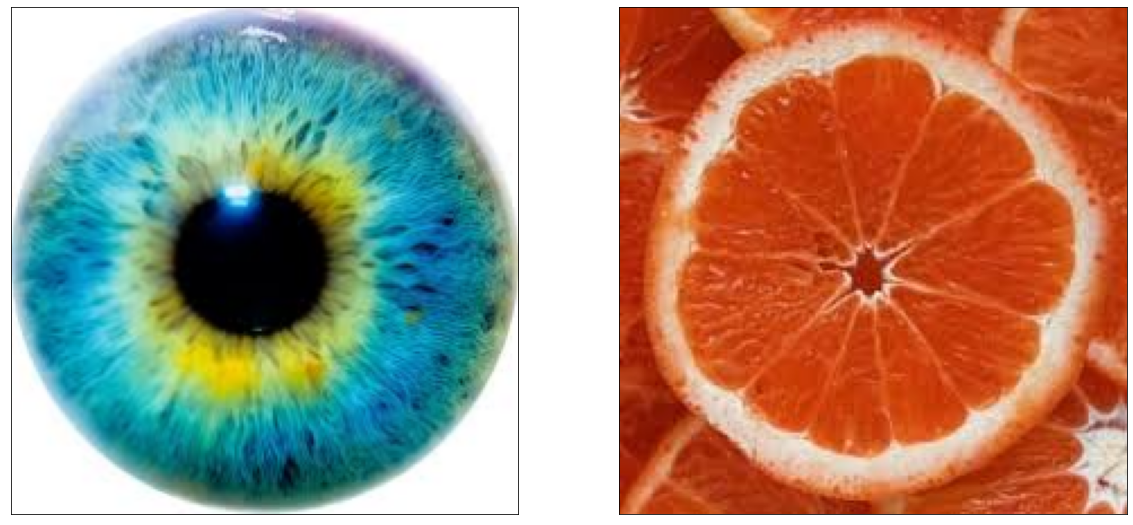

In [151]:
f1 = cv2.imread("src/circle.jpg")
f2 = cv2.imread("src/orange.jpg")
f1 = cv2.resize(f1, (f2.shape[1], f2.shape[0]))
f1, f2 = cv2.cvtColor(f1, cv2.COLOR_BGR2RGB),cv2.cvtColor(f2, cv2.COLOR_BGR2RGB)
#f1 = cv2.cvtColor(f1, cv2.COLOR_BGR2RGB)#,cv2.cvtColor(f2, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,12))
plt.subplot(121);plt.xticks([]);plt.yticks([]);plt.imshow(f1)
plt.subplot(122);plt.xticks([]);plt.yticks([]);plt.imshow(f2)
plt.show()

In [152]:
f1.shape

(225, 225, 3)

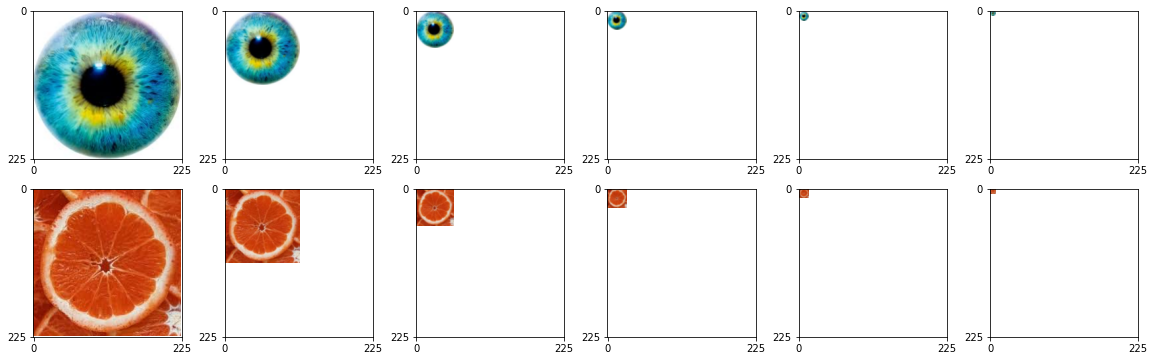

In [157]:
f1c = f1.copy()
Gaussian_f1 = [f1c]
for i in range(6):
    f1c = cv2.pyrDown(f1c)
    Gaussian_f1.append(f1c)
    
f2c = f2.copy()
Gaussian_f2 = [f2c]
for i in range(6):
    f2c = cv2.pyrDown(f2c)
    Gaussian_f2.append(f2c)

plt.figure(figsize = (20,6))
for i in range(12):
    if i < 6:
        plt.subplot(2,6,i+1);plt.imshow(Gaussian_f1[i]);plt.xticks([0,f1.shape[1]]);plt.yticks([0,f1.shape[0]])
    else:
        plt.subplot(2,6,i+1);plt.imshow(Gaussian_f2[i-6]);plt.xticks([0,f2.shape[1]]);plt.yticks([0,f2.shape[0]])

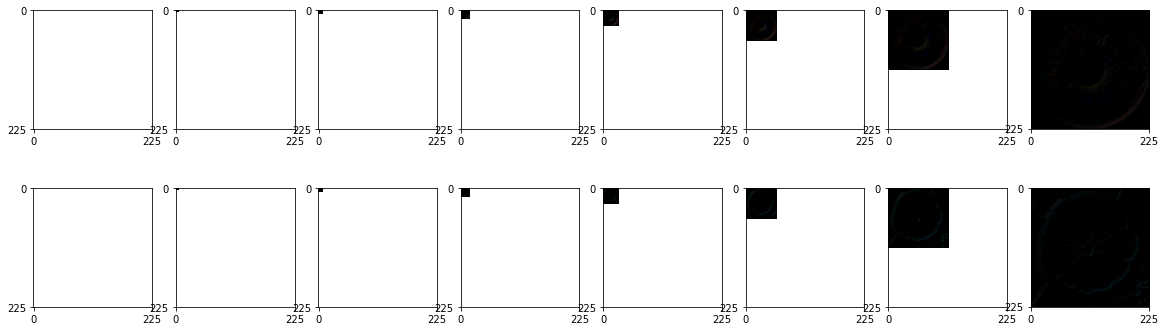

In [154]:
Laplacian_f1 = [Gaussian_f1[-1]]
for i in range(5,0,-1):
    Up = cv2.pyrUp(Gaussian_f1[i])
    tmp = cv2.resize(Gaussian_f1[i], (Up.shape[1],Up.shape[0]))
    sub = cv2.subtract(Up, tmp) # Laplacian pyramid
    Laplacian_f1.append(sub)
    
Laplacian_f2 = [Gaussian_f2[-1]]
for i in range(5,0,-1):
    Up = cv2.pyrUp(Gaussian_f2[i])
    tmp = cv2.resize(Gaussian_f2[i], (Up.shape[1],Up.shape[0]))
    sub = cv2.subtract(Up, tmp)
    Laplacian_f2.append(sub)
    
plt.figure(figsize = (20,6))
for i in range(12):
    if i < 8:
        plt.subplot(2,8,i+1);plt.imshow(Laplacian_f1[i]);plt.xticks([0,f1.shape[1]]);plt.yticks([0,f1.shape[0]])
    else:
        plt.subplot(2,8,i+1);plt.imshow(Laplacian_f2[i-8]);plt.xticks([0,f2.shape[1]]);plt.yticks([0,f2.shape[0]])   

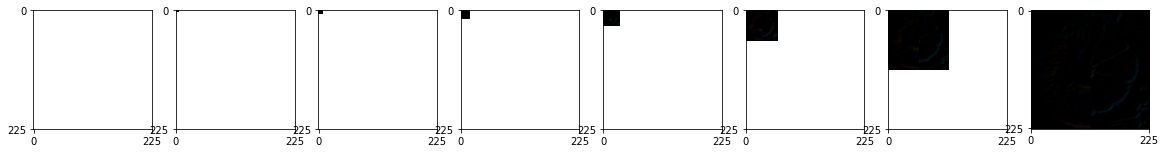

In [155]:
Laplacian_sum = []

for lf1,lf2 in zip(Laplacian_f1, Laplacian_f2):
    rows, cols, depth = lf1.shape
    LS = np.hstack((lf1[:,0:cols//2+1], lf2[:,cols//2:]))
    Laplacian_sum.append(LS)

plt.figure(figsize = (20,12))
for i in range(8):
    plt.subplot(1,8,i+1);plt.imshow(Laplacian_sum[i]);plt.xticks([0,f1.shape[1]]);plt.yticks([0,f1.shape[0]])

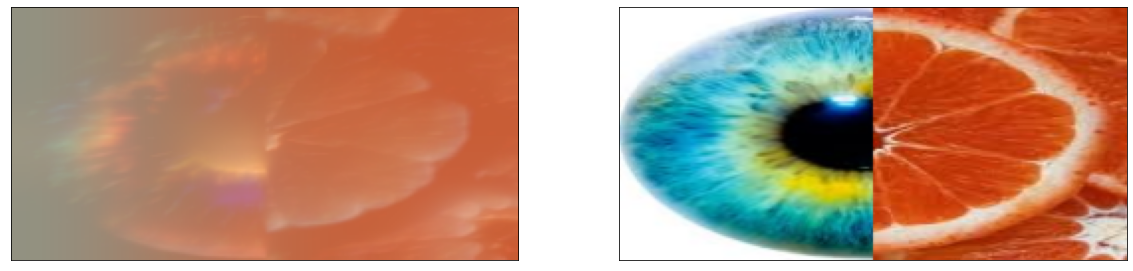

In [156]:
ls0 = Laplacian_sum[0]
for i in range(1,8):
    ls0 = cv2.pyrUp(ls0)
    tmp = cv2.resize(Laplacian_sum[i], (ls0.shape[1], ls0.shape[0]))
    ls0 = cv2.add(ls0, tmp)
    
rows, cols, _ = f1.shape
added = np.hstack((f1[:,0:cols//2+1], f2[:,cols//2:]))
added = cv2.resize(added, (ls0.shape[1], ls0.shape[0]))

plt.figure(figsize = (20,12))
plt.subplot(121);plt.imshow(ls0);plt.xticks([]);plt.yticks([]);
plt.subplot(122);plt.imshow(added);plt.xticks([]);plt.yticks([]);